## 프로젝트 목적

미국 NYC Airbnb 목록(2019)으로 MSE 평가방식을 통한 가격 예측

### 1. Baseline

라이브러리 불러오기

In [1]:
import pandas as pd

데이터 불러오기

In [2]:
train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')

### 2. EDA (탐색적 데이터 분석)

데이터 크기

In [3]:
train.shape, test.shape

((39116, 16), (9779, 15))

데이터 샘플

In [4]:
display(train.head())
display(test.head())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,150,60,1,2019-02-07,0.20,1,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Eric,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,85,4,239,2019-06-26,2.89,2,1
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,44,28,0,NaN,NaN,1,0


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244
2,414801,Industrial Brooklyn Loft with Tree-Lined Windows,319077,Shell,Brooklyn,Clinton Hill,40.68722,-73.96289,Entire home/apt,1,54,2019-03-24,0.65,4,365
3,21815842,Spacious 2 bedroom in beautiful Clinton Hill,1931990,Yarden,Brooklyn,Clinton Hill,40.68859,-73.96035,Entire home/apt,3,2,2018-05-11,0.13,1,0
4,13576581,Modern Central Park Apartment close to everything,78325795,Bozhena,Manhattan,Harlem,40.80573,-73.94994,Entire home/apt,1,160,2019-06-23,4.31,3,246


데이터 타입

In [5]:
display(train.info(),test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

None

None

결측치

In [6]:
display(train.isnull().sum(),test.isnull().sum())

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

train, test 모두 __name, host_name, last_review, reviews_per_month__ 컬럼들에 결측치가 있는 것을 확인했다.

### 3. 데이터 전처리

In [7]:
display(train.nunique(), test.nunique())

id                                39116
name                              38420
host_id                           30845
host_name                          9977
neighbourhood_group                   5
neighbourhood                       221
latitude                          17408
longitude                         13621
room_type                             3
price                               645
minimum_nights                      101
number_of_reviews                   379
last_review                        1702
reviews_per_month                   898
calculated_host_listings_count       47
availability_365                    366
dtype: int64

id                                9779
name                              9719
host_id                           8749
host_name                         4066
neighbourhood_group                  5
neighbourhood                      192
latitude                          7561
longitude                         6679
room_type                            3
minimum_nights                      63
number_of_reviews                  283
last_review                       1206
reviews_per_month                  689
calculated_host_listings_count      47
availability_365                   366
dtype: int64

name과 host_name의 개수는 인코딩하기에 수가 너무 많으므로 제거하겠다.

In [8]:
train = train.drop(['name','host_name'], axis=1)
test = test.drop(['name','host_name'], axis=1)

id는 공식 문서를 찾아본 결과 listing id로 어떤 이름으로 에어비엔비에 올렸는지를 구분하는 정보이기 때문에 name을 제거했으니 이것 또한 제거하기로 했다.

In [9]:
train = train.drop(['id'], axis=1)
test = test.drop(['id'], axis=1)

In [10]:
display(train.info(),test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         39116 non-null  int64  
 1   neighbourhood_group             39116 non-null  object 
 2   neighbourhood                   39116 non-null  object 
 3   latitude                        39116 non-null  float64
 4   longitude                       39116 non-null  float64
 5   room_type                       39116 non-null  object 
 6   price                           39116 non-null  int64  
 7   minimum_nights                  39116 non-null  int64  
 8   number_of_reviews               39116 non-null  int64  
 9   last_review                     31122 non-null  object 
 10  reviews_per_month               31122 non-null  float64
 11  calculated_host_listings_count  39116 non-null  int64  
 12  availability_365                

None

None

__last_review__를 년, 월만 드러나도록 숫자형식으로 바꿔주기로 했다.

In [11]:
train['last_review'] = train['last_review'].str.replace('-', '')
test['last_review'] = test['last_review'].str.replace('-', '')

In [12]:
display(train.describe(), test.describe())

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.911600e+04,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,31122.000000,39116.000000,39116.000000
mean,6.774143e+07,40.728848,-73.952125,152.751150,6.990720,23.272855,1.372444,7.090756,112.980826
std,7.881383e+07,0.054499,0.046354,241.752501,20.310323,44.589170,1.683963,32.661136,131.674306
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.834978e+06,40.690038,-73.983190,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.070949e+07,40.723000,-73.955740,105.000000,2.000000,5.000000,0.710000,1.000000,45.000000
75%,1.074344e+08,40.762943,-73.936338,175.000000,5.000000,23.000000,2.010000,2.000000,228.000000
max,2.743213e+08,40.912340,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,9.779000e+03,9779.000000,9779.000000,9779.000000,9779.000000,7721.000000,9779.000000,9779.000000
mean,6.713435e+07,40.729351,-73.952348,7.186931,23.280908,1.376354,7.356887,111.983332
std,7.779631e+07,0.054657,0.045361,21.292983,44.398170,1.666277,34.094038,131.417711
min,2.787000e+03,40.507080,-74.242850,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.656150e+06,40.690265,-73.982600,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.130494e+07,40.723390,-73.955280,3.000000,5.000000,0.720000,1.000000,44.000000
75%,1.072729e+08,40.763815,-73.936100,5.000000,24.000000,2.040000,2.000000,222.000000
max,2.743115e+08,40.913060,-73.716900,1000.000000,597.000000,19.750000,327.000000,365.000000


마지막 리뷰가 없는 결측치를 채우기 위해 한 가지 가정을 했다.
마지막 리뷰가 없다는 것은 리뷰 자체가 없다는 것으로, 리뷰가 없으면 소비자의 신뢰도가 낮아져 가격에도 영향을 미쳤다고 보았다.
마지막 리뷰가 10년 전이었던 매물이나 리뷰가 없는 매물이나 소비자에게는 비슷한 신뢰도를 가질 것이라고 예상하여 결측치에 최소값을 추가하는 대신, 마지막 리뷰월인 201103과의 차이를 두기 위해 20110000으로 채우기로 했다.

In [13]:
train['last_review'] = train['last_review'].fillna('20110000') 
test['last_review'] = test['last_review'].fillna('20110000')

In [14]:
train['last_review'] = train['last_review'].str[:6].astype(int)
test['last_review'] = test['last_review'].str[:6].astype(int)

한 달 간 평균 리뷰 값이 없는 결측치는 0으로 채워줬다.

In [15]:
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

last_review의 분포가 최근으로 갈 수록 많다는 것을 알 수 있다.

<AxesSubplot:>

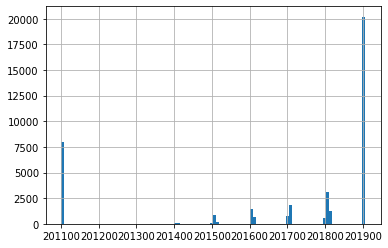

In [16]:
train['last_review'].hist(bins=100)

수치형 데이터와 범주형 데이터 분리 

In [17]:
n_train = train.select_dtypes(exclude='object').copy()
c_train = train.select_dtypes(include='object').copy()
n_test = test.select_dtypes(exclude='object').copy()
c_test = test.select_dtypes(include='object').copy()

범주형 변수를 인코딩해줬다.

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = [
        'neighbourhood_group',
        'neighbourhood',
        'room_type',
        ]

for col in cols:
    c_train[col] = le.fit_transform(c_train[col])
    c_test[col] = le.transform(c_test[col])

분리한 데이터를 다시 합쳤다.

In [19]:
train = pd.concat([n_train, c_train], axis=1)
test = pd.concat([n_test, c_test], axis=1)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

가격과 다른 피쳐들과의 상관관계를 알아보기 위해 그래프로 확인해보기로 했다.

선형 데이터와 비선형 데이터가 섞여있기 때문에 다양한 방식으로 확인해봤다.

<AxesSubplot:>

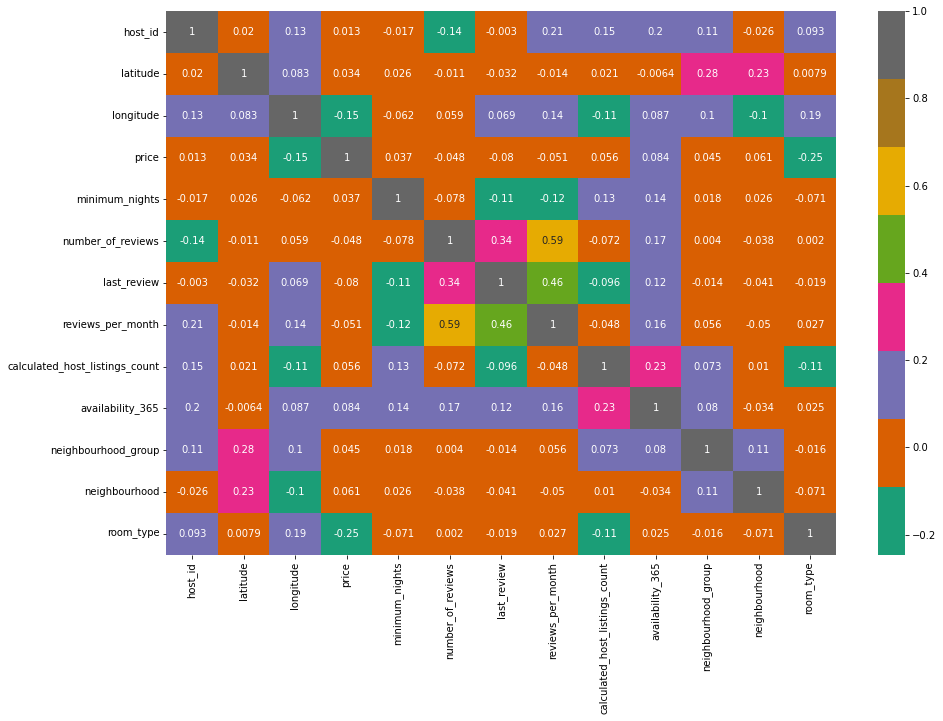

In [21]:
corr = train.corr(method='pearson')
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap = 'Dark2')

<AxesSubplot:>

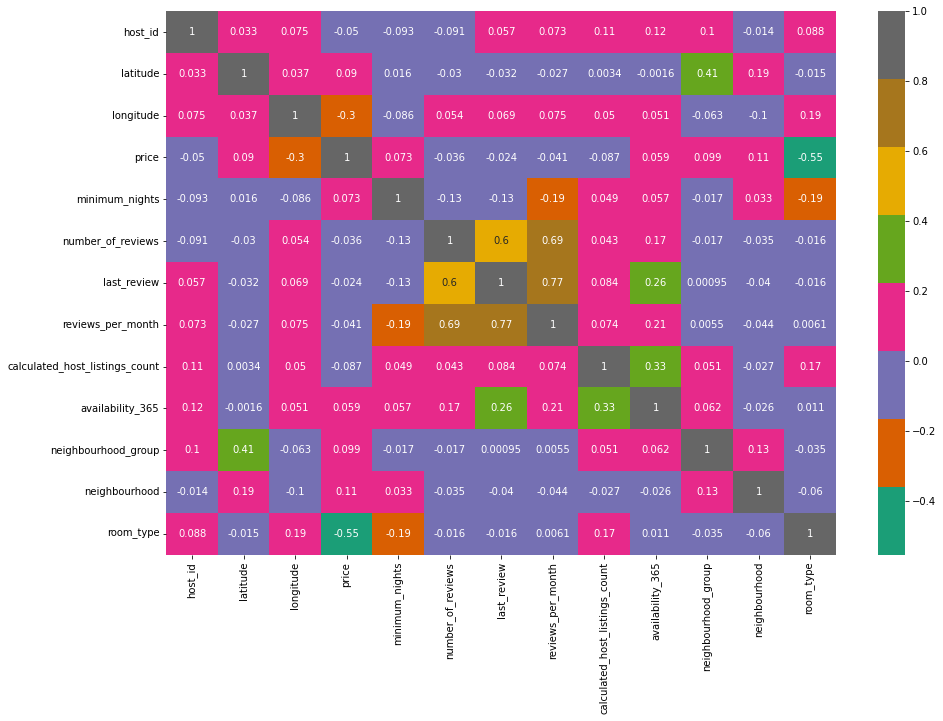

In [22]:
corr = train.corr(method='kendall')
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True,cmap = 'Dark2')

<AxesSubplot:>

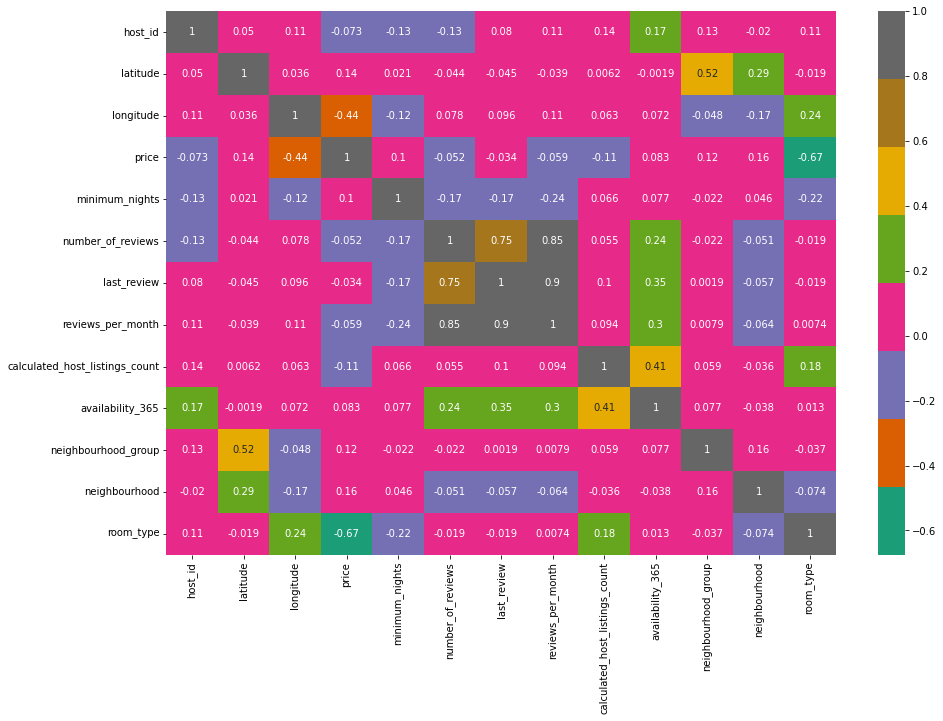

In [23]:
corr = train.corr(method='spearman')
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True,cmap = 'Dark2')

그 결과 __price__와 __room_type, longitude, availability_365__는 관계가 있고 __host_id__는 관계가 없는 것으로 드러났다.

우선 현재 상태에서 결과값을 보기로 했다.

가격 값 복사

In [24]:
target = train['price']

In [25]:
train = train.drop(['price'], axis=1)

### 4. 검증 데이터 분리

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 12), (7824, 12), (31292,), (7824,))

### 5. 머신러닝

### 머신러닝(회귀)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49002.097170953704

### 릿지 회귀 alpha =100

In [28]:
from sklearn.linear_model import Ridge

model = Ridge(alpha =100)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=7.84339e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


49245.50400497123

### 릿지 회귀 alpha =10

In [29]:
model = Ridge(alpha =10)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.33579e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


49008.45311929186

### 릿지 회귀 alpha =1

In [30]:
model = Ridge(alpha =1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.88841e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


49001.32346235989

### 릿지 회귀 alpha =0.1

In [31]:
model = Ridge(alpha =0.1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.84374e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


49002.00080698013

### 릿지 회귀 alpha =0.01

In [32]:
model = Ridge(alpha =0.01)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.83927e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


49002.08733846722

### 라쏘 회귀 alpha =1

In [33]:
from sklearn.linear_model import Lasso

model = Lasso(alpha =1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49482.15288575695

### 라쏘 회귀 alpha =2

In [34]:
model = Lasso(alpha =2)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49669.53264027392

### 라쏘 회귀 alpha =0.1

In [35]:
model = Lasso(alpha =0.1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49004.44814413113

### 라쏘 회귀 alpha =0.01

In [36]:
model = Lasso(alpha =0.01)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49001.49816798772

### 라쏘 회귀 alpha =0.001

In [37]:
model = Lasso(alpha =0.001)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49002.02892965421

### 엘라스틱넷 회귀 alpha =1

In [38]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha =1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

51167.77111109067

### 엘라스틱넷 회귀 alpha =10

In [39]:
model = ElasticNet(alpha =10)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

53000.31903977342

### 엘라스틱넷 회귀 alpha =0.1

In [40]:
model = ElasticNet(alpha =0.1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49697.74346038662

### 엘라스틱넷 회귀 alpha =0.01

In [41]:
model = ElasticNet(alpha =0.01)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49335.43479002921

### 엘라스틱넷 회귀 alpha =0.001

In [42]:
model = ElasticNet(alpha =0.001)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49020.93608104351

### 엘라스틱넷 회귀 alpha =0.0001

In [43]:
model = ElasticNet(alpha =0.0001)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49001.06285418177

### 엘라스틱넷 회귀 alpha =0.00001

In [44]:
model = ElasticNet(alpha =0.00001)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49001.94798914079

### 랜덤포레스트

In [45]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=2022)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49107.03956163207

### 하이퍼파라미터 튜닝

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import numpy as np

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


In [47]:
params={'learning_rate':[1.01, 0.09, 0.07, 0.05, 0.03, 0.01], 
        'max_depth':[1, 3, 5, 7, 9, 11], 
        'n_estimators':[50, 100, 200, 400],
        'subsample':[0.9, 0.8, 0.7, 0.6, 0.5]
        }

In [48]:
xgb = XGBRegressor()
grid = RandomizedSearchCV(xgb, params, cv=3, n_iter=20, n_jobs=-1)
grid.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          reg_l

In [49]:
grid.best_params_

{'subsample': 0.7, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.05}

### Xgboost

In [50]:
model = XGBRegressor(subsample=0.7, n_estimators= 400, max_depth= 5, learning_rate= 0.05)

model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

45584.029118075734

### 6. 채점

### 전처리를 최소로 했을 때의 결과

- __엘라스틱넷 회귀 alpha =0.0001__이 __'49001.06285418177'__로 최소였다.

------------

### 3. 데이터 전처리

target(hist)

타겟의 값이 너무 몰려있어서 로그화해서 정규분포처럼 만들어주자.

<AxesSubplot:>

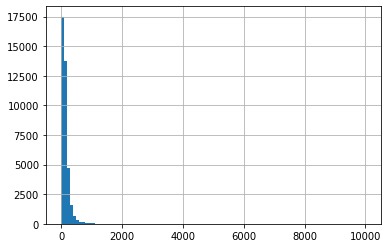

In [51]:
target.hist(bins=100)

In [52]:
import numpy as np

<AxesSubplot:>

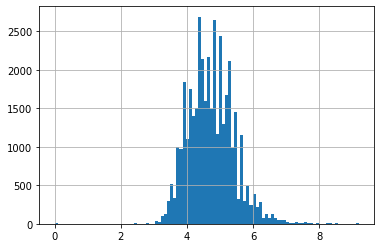

In [53]:
target = np.log1p(target)
target.hist(bins=100)

### 4. 검증 데이터 분리

In [26]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 12), (7824, 12), (31292,), (7824,))

### 5. 머신러닝

### 머신러닝(회귀)

In [53]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49002.097170953704

### 릿지 회귀 alpha =100

In [54]:
model = Ridge(alpha =100)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=7.84339e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


49245.50400497123

### 릿지 회귀 alpha =10

In [55]:
model = Ridge(alpha =10)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.33579e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


49008.45311929186

### 릿지 회귀 alpha =1

In [56]:
model = Ridge(alpha =1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.88841e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


49001.32346235989

### 릿지 회귀 alpha =0.1

In [57]:
model = Ridge(alpha =0.1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.84374e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


49002.00080698013

### 릿지 회귀 alpha =0.01

In [58]:
model = Ridge(alpha =0.01)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.83927e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


49002.08733846722

### 라쏘 회귀 alpha =1

In [59]:
model = Lasso(alpha =1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49482.15288575695

### 라쏘 회귀 alpha =2

In [60]:
model = Lasso(alpha =2)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49669.53264027392

### 라쏘 회귀 alpha =0.1

In [61]:
model = Lasso(alpha =0.1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49004.44814413113

### 라쏘 회귀 alpha =0.01

In [62]:
model = Lasso(alpha =0.01)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49001.49816798772

### 라쏘 회귀 alpha =0.001

In [63]:
model = Lasso(alpha =0.001)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49002.02892965421

### 엘라스틱넷 회귀 alpha =1

In [64]:
model = ElasticNet(alpha =1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

51167.77111109067

### 엘라스틱넷 회귀 alpha =10

In [65]:
model = ElasticNet(alpha =10)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

53000.31903977342

### 엘라스틱넷 회귀 alpha =0.1

In [66]:
model = ElasticNet(alpha =0.1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49697.74346038662

### 엘라스틱넷 회귀 alpha =0.01

In [67]:
model = ElasticNet(alpha =0.01)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49335.43479002921

### 엘라스틱넷 회귀 alpha =0.001

In [68]:
model = ElasticNet(alpha =0.001)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49020.93608104351

### 엘라스틱넷 회귀 alpha =0.0001

In [69]:
model = ElasticNet(alpha =0.0001)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49001.06285418177

### 엘라스틱넷 회귀 alpha =0.00001

In [70]:
model = ElasticNet(alpha =0.00001)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49001.94798914079

### 랜덤포레스트

In [71]:
model = RandomForestRegressor(random_state=2022)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49107.03956163207

### 하이퍼파라미터 튜닝

In [73]:
params={'learning_rate':[1.01, 0.09, 0.07, 0.05, 0.03, 0.01], 
        'max_depth':[1, 3, 5, 7, 9, 11], 
        'n_estimators':[50, 100, 200, 400],
        'subsample':[0.9, 0.8, 0.7, 0.6, 0.5]
        }

In [74]:
xgb = XGBRegressor()
grid = RandomizedSearchCV(xgb, params, cv=3, n_iter=20, n_jobs=-1)
grid.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          reg_l

In [75]:
grid.best_params_

{'subsample': 0.6, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.03}

### Xgboost

In [77]:
model = XGBRegressor(subsample=0.6, n_estimators= 200, max_depth= 7, learning_rate= 0.03)

model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

46013.53942065027

### 6. 채점

### 타겟을 로그화했을 때의 결과

- __Xgbost__가 __46013.53942065027__로 최소였다.

타겟을 로그화 한 값이 더 좋은 성능을 보였다.

--------------------

### 3. 데이터 전처리

In [83]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols = [
        'host_id',
        'latitude',
        'longitude',
        'last_review',
        'minimum_nights',
        'number_of_reviews', 
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365'
        ]

train[cols] = scaler.fit_transform(train[cols])
test[cols] = scaler.transform(test[cols])

### 4. 검증 데이터 분리

In [26]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 12), (7824, 12), (31292,), (7824,))

### 5. 머신러닝

### 머신러닝(회귀)

In [85]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49002.097170953544

### 릿지 회귀 alpha =100

In [86]:
model = Ridge(alpha =100)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49031.15920068532

### 릿지 회귀 alpha =10

In [87]:
model = Ridge(alpha =10)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

48988.87984168309

### 릿지 회귀 alpha =1

In [88]:
model = Ridge(alpha =1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

48999.493050907586

### 릿지 회귀 alpha =0.1

In [89]:
model = Ridge(alpha =0.1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49001.80811969186

### 릿지 회귀 alpha =0.01

In [90]:
model = Ridge(alpha =0.01)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49002.06794217087

### 라쏘 회귀 alpha =1

In [91]:
model = Lasso(alpha =1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49191.059618754516

### 라쏘 회귀 alpha =2

In [92]:
model = Lasso(alpha =2)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49634.976025096345

### 라쏘 회귀 alpha =0.1

In [93]:
model = Lasso(alpha =0.1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

48978.95581290715

### 라쏘 회귀 alpha =0.01

In [94]:
model = Lasso(alpha =0.01)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

48996.79533078889

### 라쏘 회귀 alpha =0.001

In [95]:
model = Lasso(alpha =0.001)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49001.493377047365

### 엘라스틱넷 회귀 alpha =1

In [96]:
model = ElasticNet(alpha =1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

51798.41772189373

### 엘라스틱넷 회귀 alpha =10

In [97]:
model = ElasticNet(alpha =10)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

53993.04081901582

### 엘라스틱넷 회귀 alpha =0.1

In [98]:
model = ElasticNet(alpha =0.1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49648.68967643006

### 엘라스틱넷 회귀 alpha =0.01

In [99]:
model = ElasticNet(alpha =0.01)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49081.30536371934

### 엘라스틱넷 회귀 alpha =0.001

In [100]:
model = ElasticNet(alpha =0.001)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

48986.5687046115

### 엘라스틱넷 회귀 alpha =0.0001

In [101]:
model = ElasticNet(alpha =0.0001)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

48998.23533384896

### 엘라스틱넷 회귀 alpha =0.00001

In [102]:
model = ElasticNet(alpha =0.00001)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49001.645060086674

### 랜덤포레스트

In [103]:
model = RandomForestRegressor(random_state=2022)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49100.94655619184

### 하이퍼파라미터 튜닝

In [104]:
params={'learning_rate':[1.01, 0.09, 0.07, 0.05, 0.03, 0.01], 
        'max_depth':[1, 3, 5, 7, 9, 11], 
        'n_estimators':[50, 100, 200, 400],
        'subsample':[0.9, 0.8, 0.7, 0.6, 0.5]
        }

In [105]:
xgb = XGBRegressor()
grid = RandomizedSearchCV(xgb, params, cv=3, n_iter=20, n_jobs=-1)
grid.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          reg_l

In [106]:
grid.best_params_

{'subsample': 0.7, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.07}

### Xgboost

In [107]:
model = XGBRegressor(subsample=0.7, n_estimators= 100, max_depth= 5, learning_rate= 0.07)

model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

45970.60620388988

### 6. 채점

### MinMaxScaler를 적용한 결과

- __Xgboost__가 __'45970.60620388988'__로 가장 낮은 값을 보였다.

타겟을 로그화하고 MinMaxScaler까지 적용한 값이 더 낮은 결과가 나왔다.

-----------

### 3. 데이터 전처리

In [108]:
train = train.drop(['host_id'], axis=1)
test = test.drop(['host_id'], axis=1)

### 4. 검증 데이터 분리

In [26]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 12), (7824, 12), (31292,), (7824,))

### 5. 머신러닝

### 머신러닝(회귀)

In [110]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49038.27183432718

### 릿지 회귀 alpha =100

In [111]:
model = Ridge(alpha =100)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49075.87769973689

### 릿지 회귀 alpha =10

In [112]:
model = Ridge(alpha =10)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49030.095468756

### 릿지 회귀 alpha =1

In [113]:
model = Ridge(alpha =1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49036.31301038518

### 릿지 회귀 alpha =0.1

In [114]:
model = Ridge(alpha =0.1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49038.048091223165

### 릿지 회귀 alpha =0.01

In [115]:
model = Ridge(alpha =0.01)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49038.24914197046

### 라쏘 회귀 alpha =1

In [116]:
model = Lasso(alpha =1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49214.08860785738

### 라쏘 회귀 alpha =2

In [117]:
model = Lasso(alpha =2)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49634.976025096345

### 라쏘 회귀 alpha =0.1

In [118]:
model = Lasso(alpha =0.1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49027.886241356195

### 라쏘 회귀 alpha =0.01

In [119]:
model = Lasso(alpha =0.01)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49033.92892439892

### 라쏘 회귀 alpha =0.001

In [120]:
model = Lasso(alpha =0.001)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49037.768196422505

### 엘라스틱넷 회귀 alpha =1

In [121]:
model = ElasticNet(alpha =1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

51802.80283327687

### 엘라스틱넷 회귀 alpha =10

In [122]:
model = ElasticNet(alpha =10)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

53993.04081901582

### 엘라스틱넷 회귀 alpha =0.1

In [123]:
model = ElasticNet(alpha =0.1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49674.02416695951

### 엘라스틱넷 회귀 alpha =0.01

In [124]:
model = ElasticNet(alpha =0.01)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49123.7994064456

### 엘라스틱넷 회귀 alpha =0.001

In [125]:
model = ElasticNet(alpha =0.001)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49029.44909286715

### 엘라스틱넷 회귀 alpha =0.0001

In [126]:
model = ElasticNet(alpha =0.0001)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49035.41491404291

### 엘라스틱넷 회귀 alpha =0.00001

In [127]:
model = ElasticNet(alpha =0.00001)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49037.922355441566

### 랜덤포레스트

In [128]:
model = RandomForestRegressor(random_state=2022)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

47371.431761202584

### 하이퍼파라미터 튜닝

In [129]:
params={'learning_rate':[1.01, 0.09, 0.07, 0.05, 0.03, 0.01], 
        'max_depth':[1, 3, 5, 7, 9, 11], 
        'n_estimators':[50, 100, 200, 400],
        'subsample':[0.9, 0.8, 0.7, 0.6, 0.5]
        }

In [130]:
xgb = XGBRegressor()
grid = RandomizedSearchCV(xgb, params, cv=3, n_iter=20, n_jobs=-1)
grid.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          reg_l

In [131]:
grid.best_params_

{'subsample': 0.6, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05}

### Xgboost

In [132]:
model = XGBRegressor(subsample=0.6, n_estimators= 200, max_depth= 7, learning_rate= 0.05)

model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

46512.689475040934

### 6. 채점

### host_id를 뺀 결과

- __Xgboost__가 __'46512.689475040934'__로 가장 낮은 값을 보였다.

타겟을 로그화하고 MinMaxScaler까지 적용한 값이 host_id를 뺀 값보다 더 높은 성능을 보였다.

-----------

### 7. 결론

: __데이터 전처리 과정에서 타겟을 로그화 한 후 정규화__까지 한 __Xgboost__ 모델이 __45970.60620388988__으로 __가장 낮은 값__을 보였다.

### 8. 참고문헌
https://www.kaggle.com/code/chirag9073/airbnb-analysis-visualization-and-prediction

### 9. 회고

- train/test를 한 번에 처리해주는 게 편하다.


- heatmap상의 상관관계는 로그값으로 치환하거나 민맥스 스케일러를 쓰나 똑같다는 걸 알았다.


- heatmap의 cmap을 통해 값이 그레디언트로 나오는 것과 끊어진 색상으로 나오는 것들이 구분되어있다는 것을 알았다.


- 상관관계를 파악하기 위해 pearson, kendall, spearman 방식을 공부했는데, pearson은 선형 데이터에 관계가 있다는 것을 알았다.


- 이상치를 제거하면 더 좋은 결과가 나오는 걸 알았는데, 그렇다고 행을 제거해버리면 머신러닝을 할 때 데이터의 갯수가 맞지 않아서 머신러닝이 불가능했다.


- 테스트 비율을 0.1, 0.3으로 조정해보려 했으나 시간관계상 불가능했다.


- 릿지, 라쏘, 엘라스틱넷은 알파값을 적용할 수 있다는 걸 알았다.


- 하이퍼파라미터 튜닝을 위해 시간이 많이 걸린 다는 것을 알았다.


- 머신러닝 및 하이퍼파라미터 튜닝에 시간이 많이 걸리는 만큼 모델의 특성을 이해해서 좋은 결과가 나오는 방식을 선택할 수 있어야 하겠단 생각이 들었다.


- 참고문헌에서 본 'name' 열에서 키워드를 뽑아 이미지로 치환하고 가장 많이 사용된 키워드를 중심으로 name을 치환했다면 더 좋은 결과가 나왔을 것 같기도 하다.


- 관련 있다고 생각되는 값들만 이용해서 머신러닝도 해봤는데 오히려 수치가 증가해서 의외였다. 그렇다고 관련 없다고 생각되는 값도 빼서 머신러닝을 시키면 수치가 감소하는 것도 아니었다. 아직은 데이터 간의 상관관계를 파악하는 기술이 부족한 것 같다.